## 2. Model - Moving Average

In [1]:
import pandas as pd 
import numpy as np 
import yfinance as yf 
import matplotlib.dates as mdates 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('seaborn-v0_8-dark') 
import warnings
warnings.filterwarnings('ignore')   

#### 1. Fetching Data

In [2]:
start_date = '2018-01-01'
end_date = '2019-09-01' 

assets = 'BTC-USD' 

In [3]:
btc_adjClose = pd.DataFrame() 

btc_adjClose['Adj_Close'] = yf.download('BTC-USD',start=start_date,end=end_date)['Adj Close'] 

[*********************100%%**********************]  1 of 1 completed


#### 2. Splitting data into training and testing set

In [4]:
print(f'Size of train dataset : {int(len(btc_adjClose)*0.80)}') 
print(f'Size of test dataset : {len(btc_adjClose)-int(len(btc_adjClose)*0.80)}') 

Size of train dataset : 486
Size of test dataset : 122


In [5]:
btc_train = btc_adjClose[:487] 
btc_test = btc_adjClose[486:] 

print(f'Shape of train after splitting : {btc_train.shape}') 
print(f'Shape of test after splitting : {btc_test.shape}') 

Shape of train after splitting : (487, 1)
Shape of test after splitting : (122, 1)


#### 3. Defining MA Model and Predicting using MA

In [6]:
preds = [] 
for i in range(0,btc_test.shape[0]):
    a = btc_train['Adj_Close'][len(btc_train)-122+i:].sum()+sum(preds) 
    b = a/122
    preds.append(b) 

#### 4. Evaluating the predictions

In [7]:
# RMSE for moving average model 

rmse = np.sqrt(np.mean(np.power((np.array(btc_test['Adj_Close'])-preds),2))) 
print(f'RMSE for MA : {rmse:.6f}') 

# MAPE for moving average model

mape = np.mean(np.abs(preds-btc_test['Adj_Close'].values)/np.abs(btc_test['Adj_Close'].values)) 
print(f'MAPE for MA : {mape:.6f}') 

# MPE for moving average model

mpe = np.mean((preds-btc_test['Adj_Close'].values)/btc_test['Adj_Close'].values)
print(f'MPE for MA : {mpe:.6f}')  

RMSE for MA : 5384.391273
MAPE for MA : 0.522660
MPE for MA : -0.522660


#### 5. Correlation between actual values and predicted via Moving Average

In [8]:
btc_test['MA_Predictions'] = preds 

corr_MA = np.corrcoef(btc_test['MA_Predictions'].dropna().values,btc_test['Adj_Close'].dropna().values)[0,1]
print(f'Correlation between test_BTC_close and Moving Average : {corr_MA*100:.2f}%') 

Correlation between test_BTC_close and Moving Average : 83.05%


#### 6. Plotting the predictions from MA w.r.t Test values

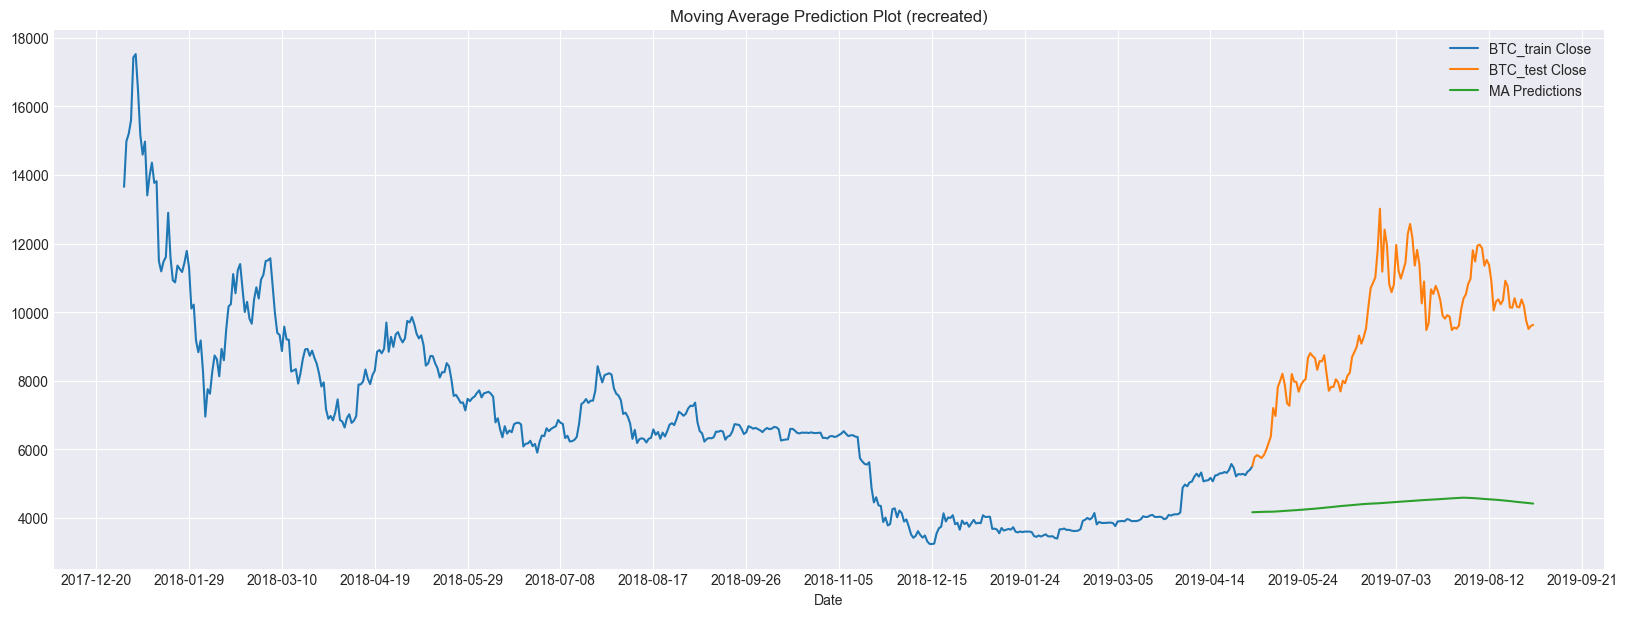

In [9]:
plt.figure(figsize=(20,7)) 
ax = plt.axes() 
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) 
plt.plot(btc_train['Adj_Close'],label='BTC_train Close') 
plt.plot(btc_test['Adj_Close'],label='BTC_test Close') 
plt.plot(btc_test['MA_Predictions'],label='MA Predictions') 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
plt.xlabel('Date') 
plt.title('Moving Average Prediction Plot (recreated)')
ax.grid(True) 
plt.legend(loc='best')
plt.show()  